# Calories Burn Prediction using Machine Learning

## Problem
The goal of this project is to develop a machine learning model that can accurately predict the number of calories burnt during physical activities. Accurate calorie prediction is crucial for individuals seeking to monitor and manage their fitness and weight loss goals. Existing methods for estimating calorie expenditure often lack precision and rely on generalized formulas that do not consider individual variations. By leveraging machine learning techniques, this project aims to create a more personalized and accurate prediction model that takes into account various factors such as heart rate, duration of activity, body metrics, and other relevant features. The developed model will enable individuals to track their calorie expenditure more effectively, optimize their exercise routines, and make informed decisions for achieving their fitness objectives.

## Objective 
Develop a machine learning model to accurately predict calories burnt during physical activities, enabling individuals to track their calorie expenditure and optimize their fitness routines.

In [1]:
# Load libraries
import numpy as np 
import pandas as pd
import researchpy as rp 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load dataset
data = pd.read_csv('../data/calories_burnt.csv')
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## Exploring Data 

In [3]:
# check shape of data 
data.shape

(15000, 9)

In [4]:
# dtypes 
data.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [5]:
# info 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
# check missing data 
data.isnull().sum() 

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [7]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

## Descriptive statistics

In [8]:
# summary statistics of numerical variables 
rp.summary_cont(data[['Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp', 'Calories']])

C:\Users\JHossain\anaconda3\lib\site-packages\researchpy\summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,15000.0,42.7898,16.9803,0.1386,42.5180,43.0616
1,Height,15000.0,174.4651,14.2581,0.1164,174.2369,174.6933
2,Weight,15000.0,74.9669,15.0357,0.1228,74.7262,75.2075
3,Duration,15000.0,15.5306,8.3192,0.0679,15.3975,15.6637
4,Heart_Rate,15000.0,95.5185,9.5833,0.0782,95.3652,95.6719
5,Body_Temp,15000.0,40.0255,0.7792,0.0064,40.0130,40.0379
6,Calories,15000.0,89.5395,62.4570,0.5100,88.5400,90.5391


In [10]:
# summary statistics of categorical variables 
rp.summary_cat(data['Gender'])

,Variable,Outcome,Count,Percent
0,Gender,female,7553,50.35
1,,male,7447,49.65


## Correlations between Variables 

In [11]:
# correlation: Pearson’s by default 
data.corr(method='pearson')

C:\Users\JHossain\AppData\Local\Temp\ipykernel_16664\427603040.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


## Skewness 

In [12]:
# skew 
data.skew() 

C:\Users\JHossain\AppData\Local\Temp\ipykernel_16664\942340472.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


User_ID       0.004788
Age           0.473383
Height       -0.006190
Weight        0.226725
Duration      0.004751
Heart_Rate   -0.010704
Body_Temp    -0.994382
Calories      0.505371
dtype: float64

## Data visualizations

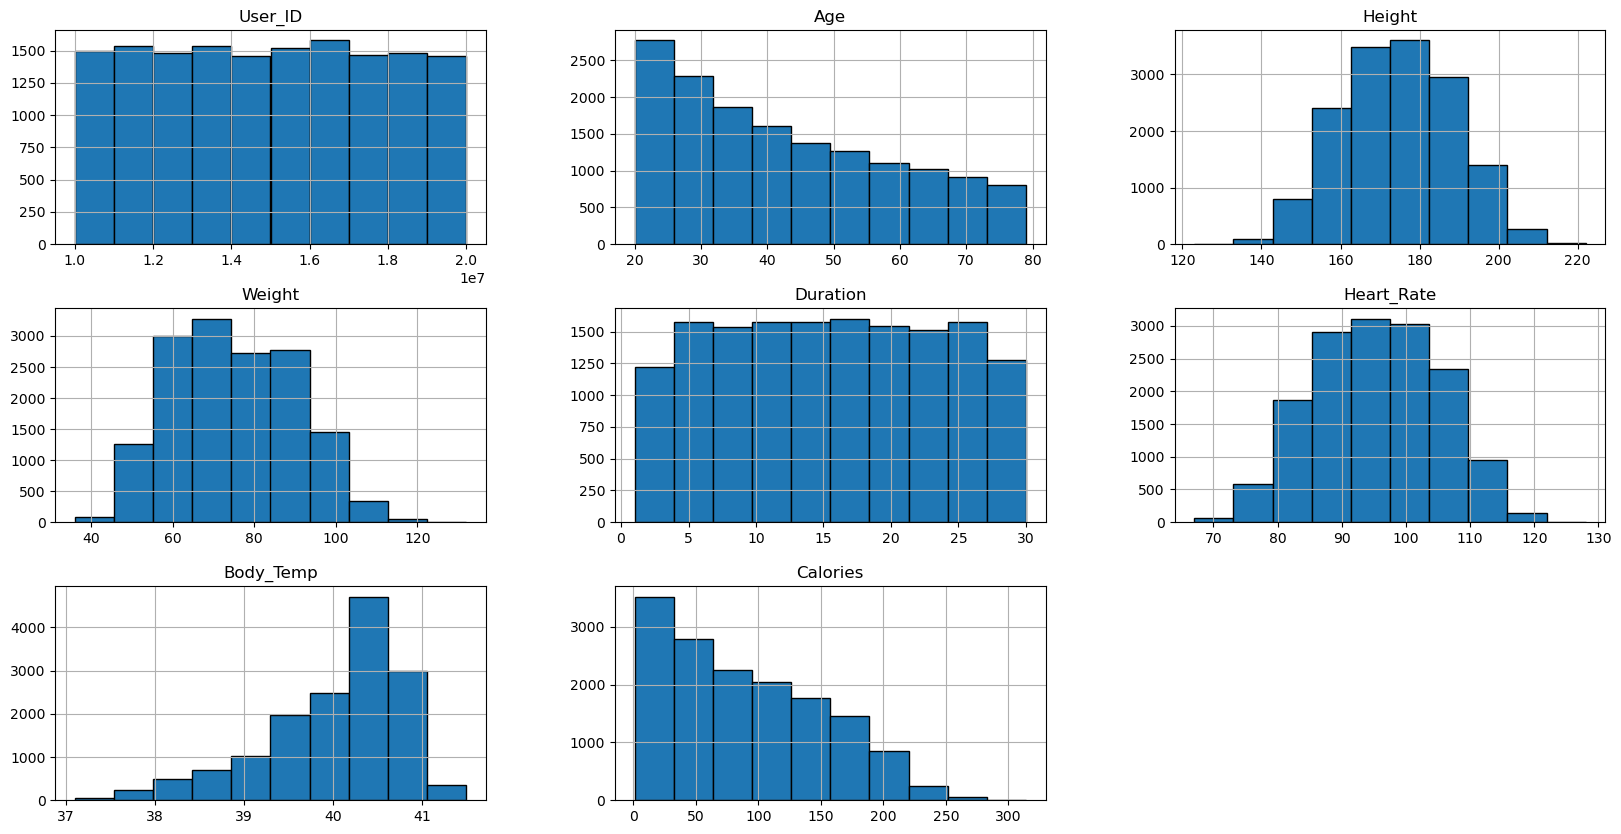

In [13]:
# Univariate distributions with histogram
data.select_dtypes(exclude = "object").hist(figsize=(20,10), edgecolor='black')
plt.show() 

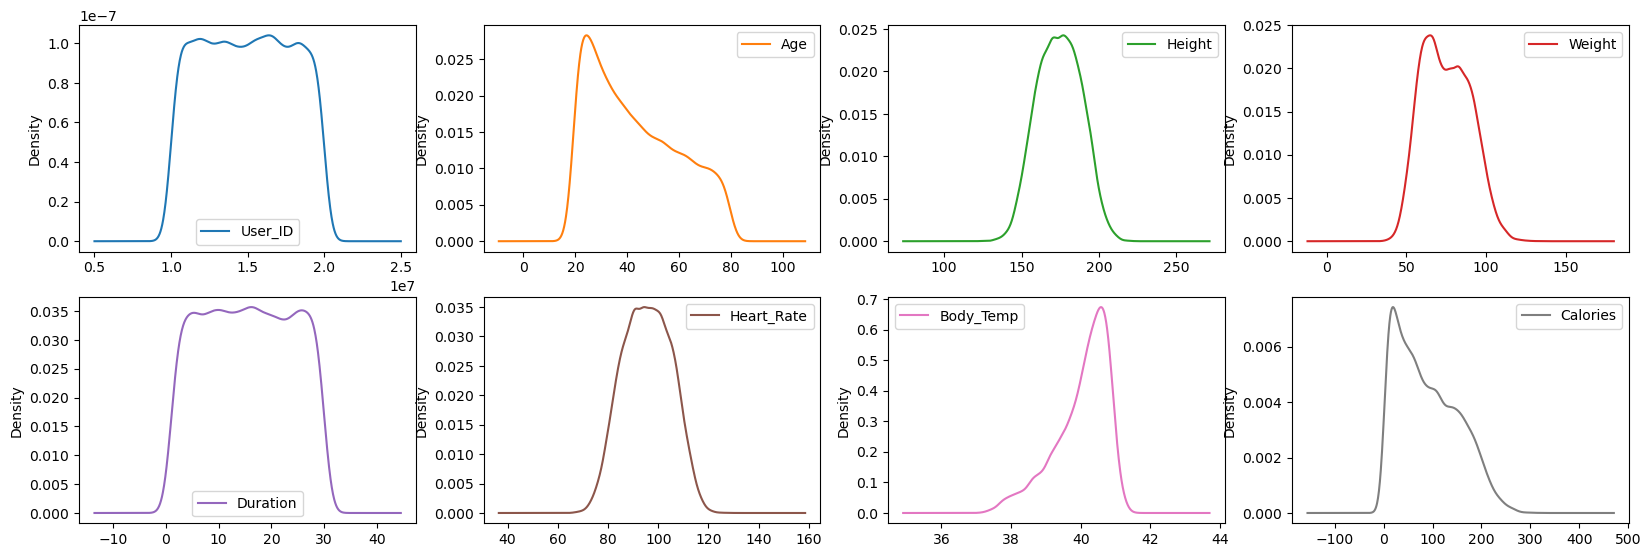

In [14]:
# Univariate distributions with density plot 
data.select_dtypes(exclude = "object").plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(3,4))
plt.show() 

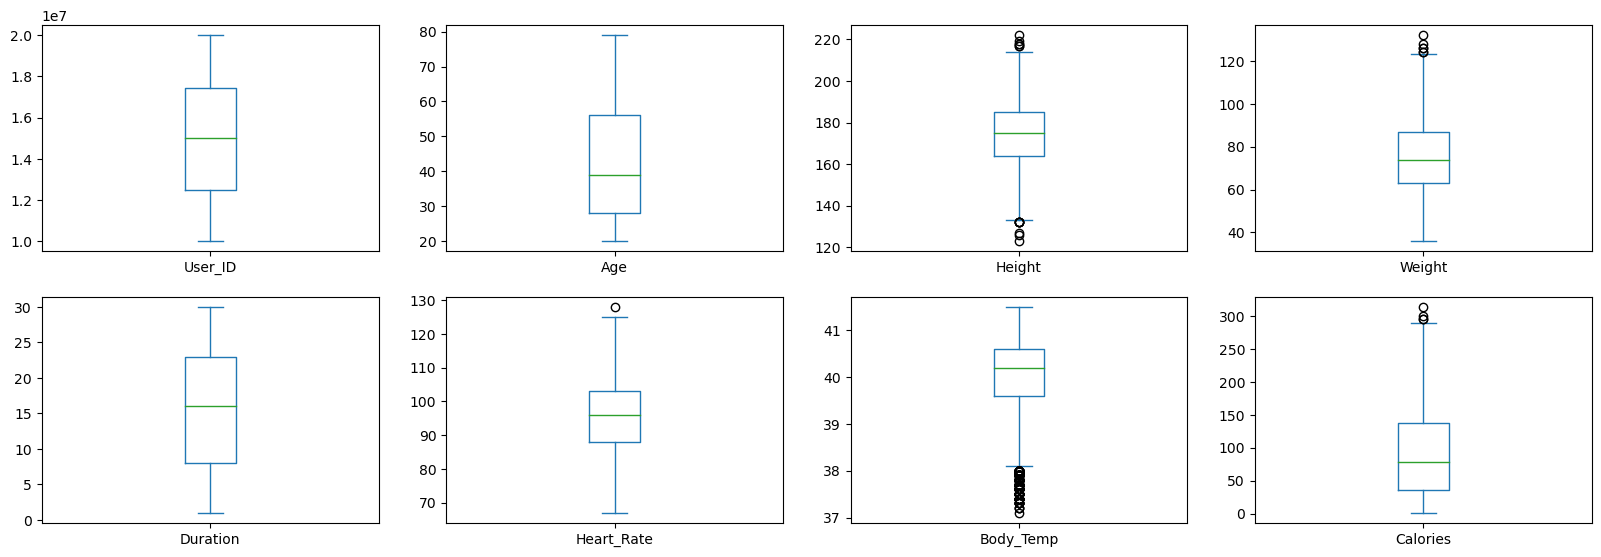

In [15]:
# Univariate distributions with box plots 
data.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(3,4))
plt.show() 

C:\Users\JHossain\AppData\Local\Temp\ipykernel_16664\2539154758.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


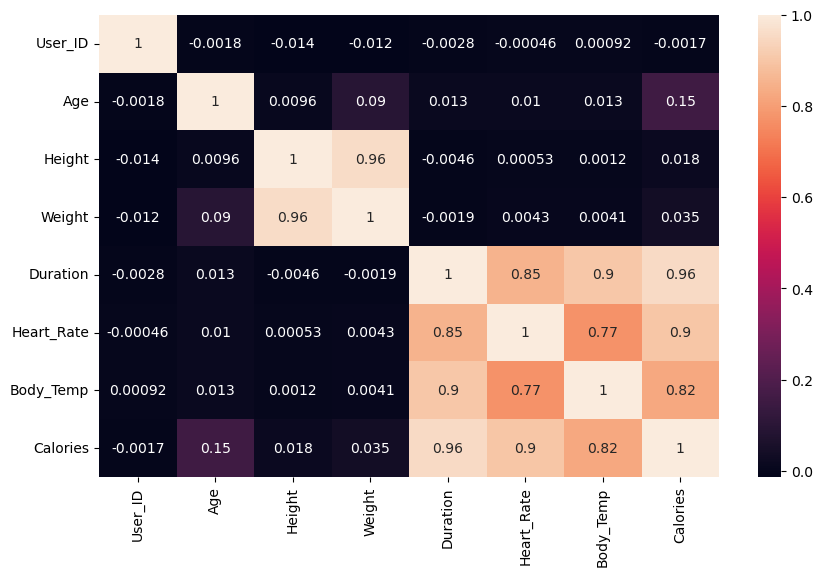

In [16]:
# Multivariate plots with correlations 
plt.figure(figsize=(10,6))
corr = data.corr() 
sns.heatmap(corr, annot=True)
plt.show()

## Setup 

In [17]:
# exmine first few rows of data 
data.head() 

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [18]:
# import pycaret classification and init setup
from pycaret.regression import *
setup(data, target = 'Calories', train_size = .08, session_id = 123)

,Description,Value
0,Session id,123
1,Target,Calories
2,Target type,Regression
3,Original data shape,"(15000, 9)"
4,Transformed data shape,"(15000, 9)"
5,Transformed train set shape,"(1200, 9)"
6,Transformed test set shape,"(13800, 9)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,1


## Compare Models 

In [19]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.3280,23.6355,4.7654,0.9941,0.1121,0.0703,0.2560
et,Extra Trees Regressor,3.0345,25.0997,4.8829,0.9938,0.0766,0.0514,0.2770
lightgbm,Light Gradient Boosting Machine,2.9355,26.1030,4.7990,0.9937,0.0782,0.0505,0.3400
rf,Random Forest Regressor,4.1750,45.4263,6.5779,0.9887,0.0917,0.0654,0.2870
dt,Decision Tree Regressor,7.2508,114.9292,10.6882,0.9703,0.1401,0.1057,0.2130
lr,Linear Regression,8.2643,129.8015,11.3331,0.9669,0.3870,0.2764,0.7340
ridge,Ridge Regression,8.2641,129.8007,11.3329,0.9669,0.3871,0.2767,0.2130
br,Bayesian Ridge,8.2651,129.8276,11.3336,0.9669,0.3881,0.2776,0.2120
lar,Least Angle Regression,8.4840,136.2552,11.5893,0.9652,0.4087,0.2885,0.2120
ada,AdaBoost Regressor,9.0554,137.0731,11.6582,0.9649,0.3668,0.3492,0.2430


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

## Create Model 

In [20]:
# create model 
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3555,20.8547,4.5667,0.9947,0.1143,0.0703
1,3.0126,18.4520,4.2956,0.9955,0.1406,0.0836
2,3.1049,17.2076,4.1482,0.9955,0.1126,0.0781
3,3.3342,25.6960,5.0691,0.9921,0.1001,0.0651
4,3.1462,19.7783,4.4473,0.9944,0.0764,0.0507
5,3.2958,22.8887,4.7842,0.9940,0.1339,0.0690
6,3.3478,20.2980,4.5053,0.9949,0.1078,0.0740
7,2.9264,15.4323,3.9284,0.9955,0.0850,0.0525
8,3.2084,19.3546,4.3994,0.9952,0.1129,0.0759


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
# print model parameters
print(gbr)

GradientBoostingRegressor(random_state=123)


## Tune Model 

In [24]:
# tune hyperparameters of et
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.5783,21.9401,4.6840,0.9944,0.0578,0.0419
1,2.8951,21.5455,4.6417,0.9947,0.0724,0.0523
2,2.6212,14.9204,3.8627,0.9961,0.0594,0.0426
3,2.8785,19.8920,4.4600,0.9939,0.0661,0.0463
4,2.7726,17.0033,4.1235,0.9952,0.0613,0.0439
5,2.6645,16.2233,4.0278,0.9958,0.0521,0.0389
6,2.9591,21.0932,4.5927,0.9947,0.0672,0.0457
7,2.7118,15.4020,3.9245,0.9956,0.0587,0.0427
8,3.1376,23.6521,4.8633,0.9941,0.0996,0.0615


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
# print tuned model
print(tuned_gbr)

GradientBoostingRegressor(random_state=123)


In [27]:
# to access the tuner object you can set return_tuner = True
tuned_gbr, tuner = tune_model(gbr, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.5783,21.9401,4.6840,0.9944,0.0578,0.0419
1,2.8951,21.5455,4.6417,0.9947,0.0724,0.0523
2,2.6212,14.9204,3.8627,0.9961,0.0594,0.0426
3,2.8785,19.8920,4.4600,0.9939,0.0661,0.0463
4,2.7726,17.0033,4.1235,0.9952,0.0613,0.0439
5,2.6645,16.2233,4.0278,0.9958,0.0521,0.0389
6,2.9591,21.0932,4.5927,0.9947,0.0672,0.0457
7,2.7118,15.4020,3.9245,0.9956,0.0587,0.0427
8,3.1376,23.6521,4.8633,0.9941,0.0996,0.0615


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [28]:
tuned_gbr

GradientBoostingRegressor(random_state=123)

In [29]:
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['User_ID',
                                                                          'Age',
                                                                          'Height',
                                                                          'Weight',
                                                                          'Duration',
                                                                          'Heart_Rate',
                                                                          'Body_Temp'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              Transf...
                                        'actual_estimator__min_samples_split': [2,
                                                                                4,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                                           170,
                                                                           180,
                                                                           190,
                                                                           200,
                                                                           210,
                                                                           220,
                                                                           230,
                                                                           240,
                                                                           250,
                                                                           260,
                                                                           270,
                                                                           280,
                                                                           290,
                                                                           300],
                                     

## Analyze Model 

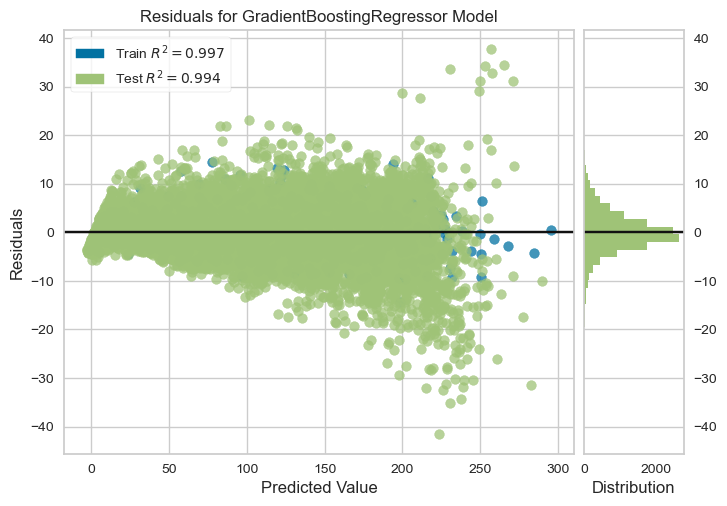

In [30]:
# residuals plot 
plot_model(gbr, plot = 'residuals')

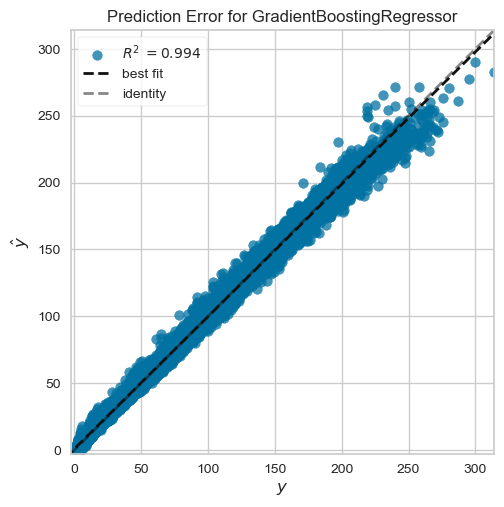

In [31]:
# predicting error plot 
plot_model(gbr, plot = 'error')

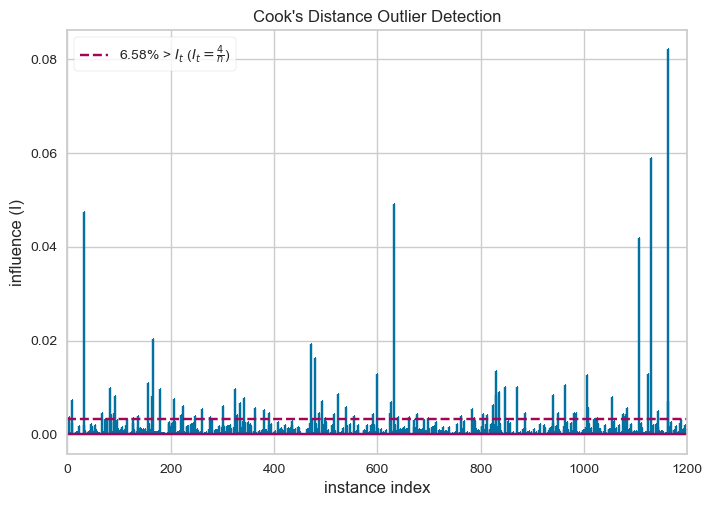

In [32]:
# cooks distance plot 
plot_model(gbr, plot = 'cooks')

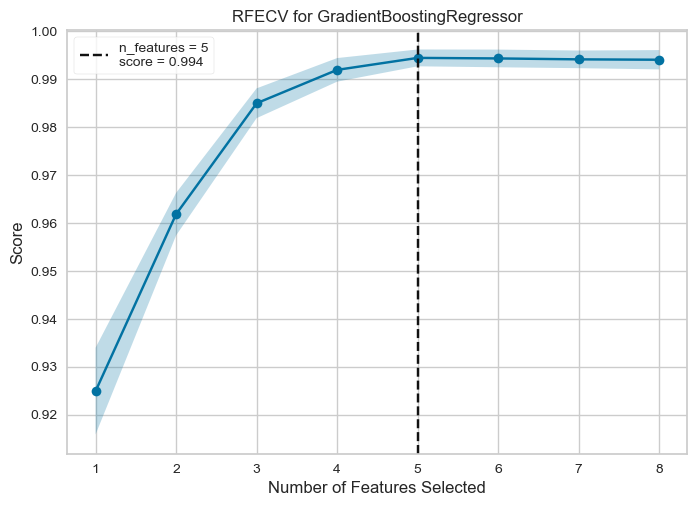

In [33]:
# recursive feature selection
plot_model(gbr, plot = 'rfe')

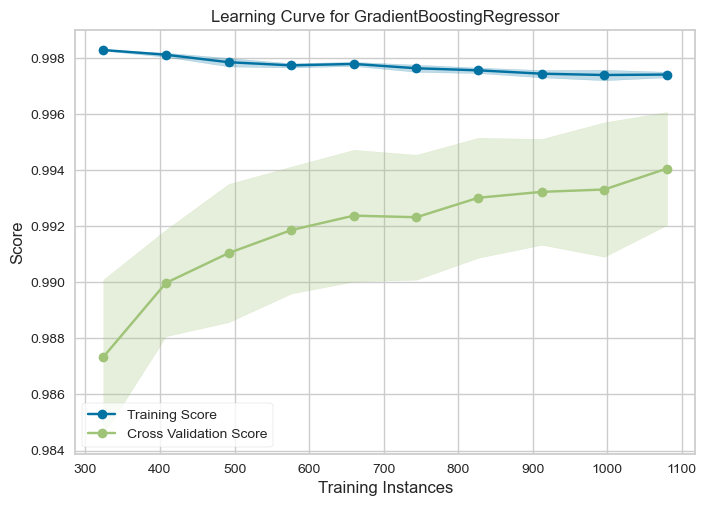

In [34]:
# learning curve 
plot_model(gbr, plot = 'learning')

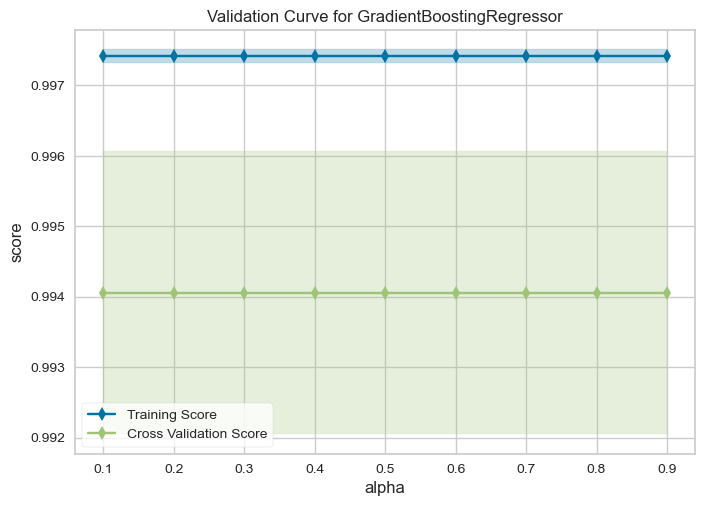

In [35]:
# validation curve 
plot_model(gbr, plot = 'vc')

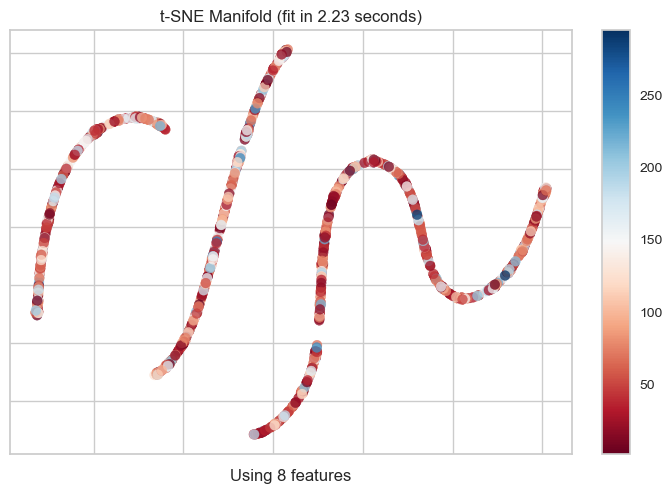

In [36]:
# manifold learning plot 
plot_model(gbr, plot = 'manifold')

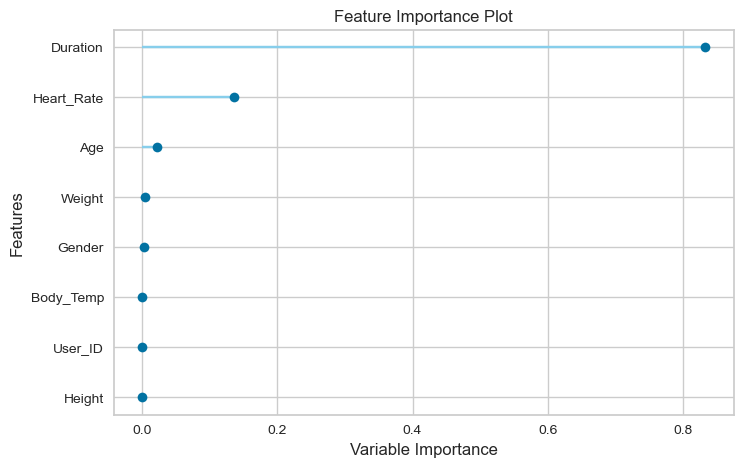

In [37]:
# plot feature importance
plot_model(gbr, plot = 'feature')

## Evaluate Model 

In [38]:
# evaluate model 
evaluate_model(gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalize Model 

In [39]:
# finalize a model
finalize_model(gbr)

Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['User_ID', 'Age', 'Height',
                                             'Weight', 'Duration', 'Heart_Rate',
                                             'Body_Temp'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Gender'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Gender'],
                                    transformer=OrdinalEncoder(cols=['Gender'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Gender',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64}]))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

## Prediction

In [40]:
# predict on test set
holdout_pred = predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3.3690,23.8653,4.8852,0.9939,0.1179,0.0679


In [41]:
# show predictions df
holdout_pred.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,prediction_label
6958,15399629,female,71,166.0,58.0,20.0,99.0,40.900002,123.0,134.324785
7534,17761176,male,22,191.0,92.0,2.0,84.0,38.099998,5.0,0.573631
2975,14032506,female,50,152.0,48.0,13.0,87.0,39.900002,60.0,59.109736
3903,15190143,female,76,170.0,73.0,3.0,74.0,38.099998,10.0,8.083763
8437,18418052,female,67,160.0,61.0,5.0,79.0,38.900002,20.0,18.910678


In [42]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('Calories', axis=1, inplace=True)
new_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [43]:
# predict model on new_data
predictions = predict_model(gbr, data = new_data)
predictions.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,prediction_label
0,14733363,male,68,190.0,94.0,29.0,105.0,40.799999,216.742066
1,14861698,female,20,166.0,60.0,14.0,94.0,40.299999,67.646251
2,11179863,male,69,179.0,79.0,5.0,88.0,38.700001,25.152727
3,16180408,female,34,179.0,71.0,13.0,100.0,40.500000,72.968404
4,17771927,female,27,154.0,58.0,10.0,81.0,39.799999,36.552712


## Save Model 

In [47]:
# save pipeline
save_model(gbr, '../models/calories')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['User_ID', 'Age', 'Height',
                                              'Weight', 'Duration', 'Heart_Rate',
                                              'Body_Temp'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                            

In [48]:
# load pipeline
loaded_best_pipeline = load_model('../models/calories')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['User_ID', 'Age', 'Height',
                                             'Weight', 'Duration', 'Heart_Rate',
                                             'Body_Temp'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Gender'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Gender'],
                                    transformer=OrdinalEncoder(cols=['Gender'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Gender',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64}]))),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

In [49]:
# prediction
prediction_holdout = predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3.3690,23.8653,4.8852,0.9939,0.1179,0.0679


In [50]:
prediction_holdout.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,prediction_label
6958,15399629,female,71,166.0,58.0,20.0,99.0,40.900002,123.0,134.324785
7534,17761176,male,22,191.0,92.0,2.0,84.0,38.099998,5.0,0.573631
2975,14032506,female,50,152.0,48.0,13.0,87.0,39.900002,60.0,59.109736
3903,15190143,female,76,170.0,73.0,3.0,74.0,38.099998,10.0,8.083763
8437,18418052,female,67,160.0,61.0,5.0,79.0,38.900002,20.0,18.910678
